# 3. Car sales data
Dataset link:https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv
Problem Statement
Use basics understanding of Pandas,matplotlib and Seaborn and the basic commands of (EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis on 'New Car Sales' data Analyzing the car sales data with :

Finding patterns in Data
Determining relationships in Data
Checking of assumptions

# Importing Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Importing Data

In [2]:
#importing data

car_sales_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',  encoding='cp1252')
car_sales_data.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


# Checking the info

In [3]:

car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [4]:
car_sales_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


# Pandas profiling

In [5]:
# To install pandas profiling please run this command.
!pip install --user pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\test\appdata\roaming\python\python37\site-packages (2.9.0)


In [6]:
# To install pandas profiling please run this command.
!pip install --user joblib --upgrade

Requirement already up-to-date: joblib in c:\users\test\appdata\roaming\python\python37\site-packages (0.17.0)


In [7]:
# To install pandas profiling please run this command.
!pip install --user matplotlib --upgrade

Requirement already up-to-date: matplotlib in c:\users\test\appdata\roaming\python\python37\site-packages (3.3.2)


In [8]:
!pip install pandas-profiling


In [9]:
import pandas_profiling 


# Checking Duplicates and dropping it


In [10]:
duplicateDFRow = car_sales_data[car_sales_data.duplicated()]
len(duplicateDFRow)

113

In [11]:
car_sales = car_sales_data.drop_duplicates()
len(car_sales)

9463

# Checking for null value and filling it up

In [12]:
car_sales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [13]:
# to fill in blank values in drive column based on mode.
car_sales['drive'] = car_sales.groupby(['car','model'])['drive'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('Other'))

C:\Users\test\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
car_sales['drive'] = car_sales.groupby(['car','model'])['drive'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('Other'))

# There are "0" in Mileage and price. So we nee to fix it.

In [38]:
car_sales.to_csv(r'C:\Users\test\Desktop\export_dataframe.csv', index = False, header=True)

# The price is positively skewed and can see some outliers  so we can fill the "0" with median value.

C:\Users\test\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

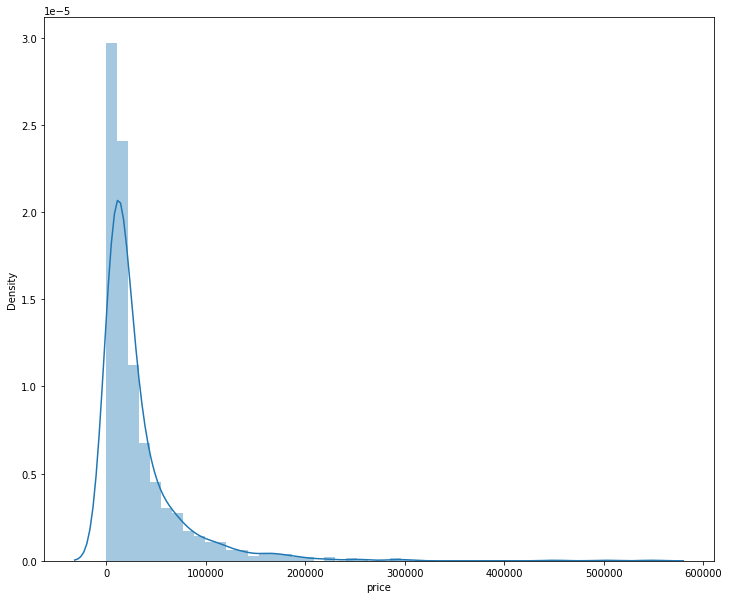

In [32]:


fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.distplot(car_sales.groupby(['price'], as_index=False)['price'].mean()['price'], ax=ax)


# The mileage is positively skewed and can see some outliers so we can fill the "0" with median value.

C:\Users\test\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

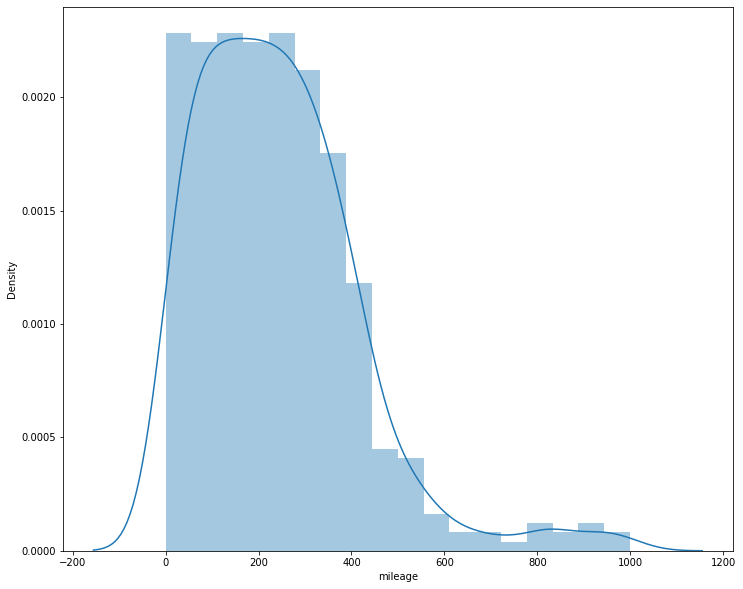

In [35]:



fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.distplot(car_sales.groupby(['mileage'], as_index=False)['mileage'].mean()['mileage'], ax=ax)


# New data set after dropping duplicates and adding missing value with mode in category column of Drive and relacing "0" in Price & mileage column with mean.


In [280]:

car_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9463 non-null   object 
 1   price         9463 non-null   float64
 2   body          9463 non-null   object 
 3   mileage       9463 non-null   int64  
 4   engV          9029 non-null   float64
 5   engType       9463 non-null   object 
 6   registration  9463 non-null   object 
 7   year          9463 non-null   int64  
 8   model         9463 non-null   object 
 9   drive         9463 non-null   object 
 10  Cars sold     9463 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.2+ MB


In [18]:
profile = pandas_profiling.ProfileReport(car_sales_data)
profile.to_file(output_file="profiling_before_preprocessing.html")

# Visualization starts

Text(0.5, 1.0, 'Donut Plot showing the type of car sold')

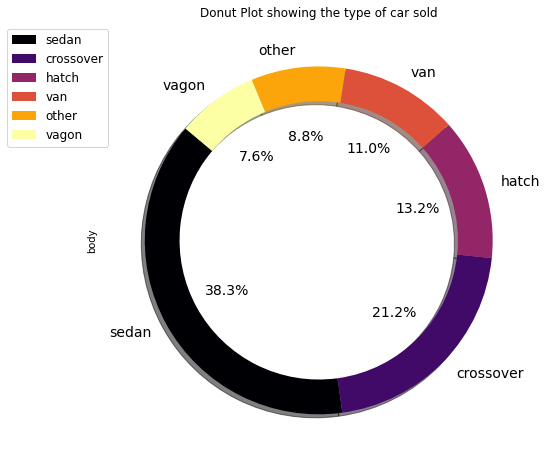

In [99]:
space = np.ones(6)/5
car_sales['body'].value_counts().plot(kind='pie',  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=140, figsize=(8,8), cmap='inferno', )
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.ylabel('body')
plt.title('Donut Plot showing the type of car sold')


 Sedan is the most sold car type and Vagon  is the least sold.
 Crossover is the second most sold car type.


In [148]:
grouped_single = car_sales.groupby('body').mean()
grouped_single


,price,mileage,engV,year
body,,,,
crossover,29322.536625,877.251619,3.173186,2009.406079
hatch,8512.398647,282.366186,1.837908,2006.493590
other,19326.626225,491.594692,2.945148,2006.579011
sedan,12169.613656,307.132523,2.633747,2004.944506
vagon,8923.189760,302.826147,2.252189,2005.503477
van,10634.609802,313.460501,2.592071,2007.179191


C:\Users\test\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


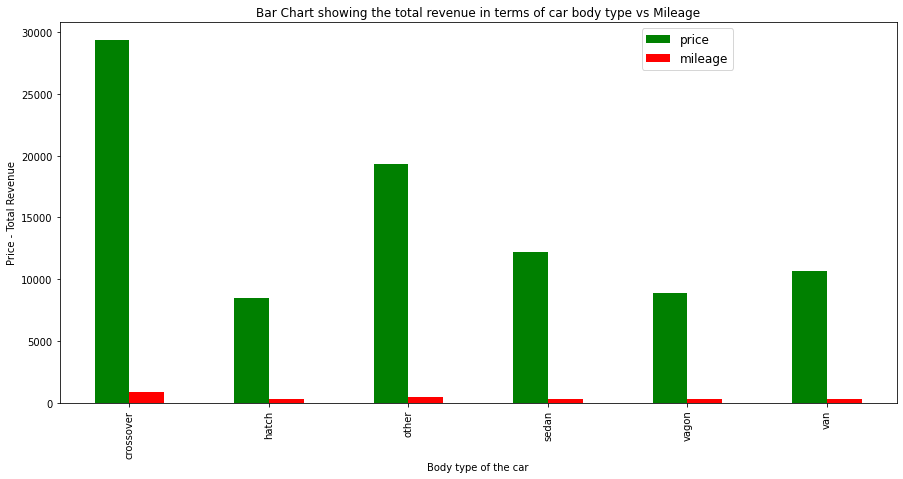

In [179]:
car_sales.groupby(['body'])['price', 'mileage'].mean().plot(kind='bar', figsize=(15, 7), color='grey'"green")
plt.xlabel('Body type of the car')
plt.ylabel('Price - Total Revenue')
plt.title('Bar Chart showing the total revenue in terms of car body type vs Mileage')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.),fontsize=12)

Crossover body type brought more revenue to the company.

Other type comes second.

Also crossover cars provided better mileage when compared to others.


C:\Users\test\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


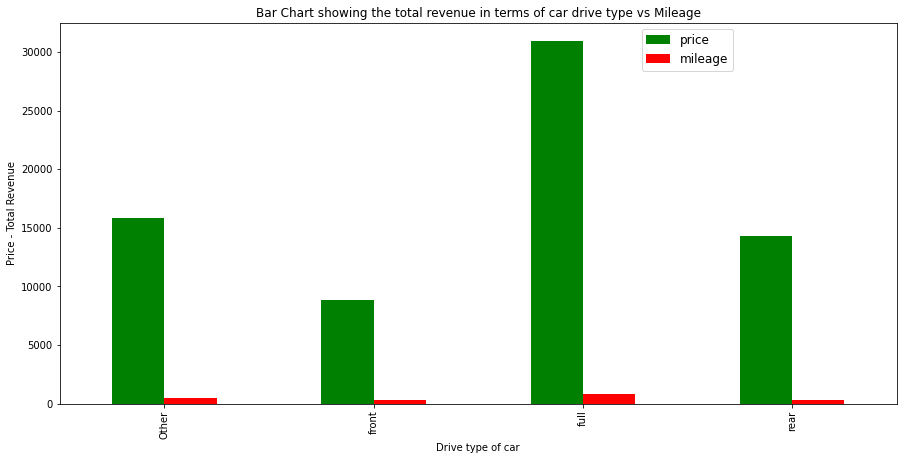

In [181]:
car_sales.groupby(['drive'])['price', 'mileage'].mean().plot(kind='bar', figsize=(15, 7), color='grey'"green")
plt.xlabel('Drive type of car')
plt.ylabel('Price - Total Revenue')
plt.title('Bar Chart showing the total revenue in terms of car drive type vs Mileage')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.),fontsize=12)

 Full drive type brought more revenue to the company. 
 
 Full drive type also provided better mileage.


C:\Users\test\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


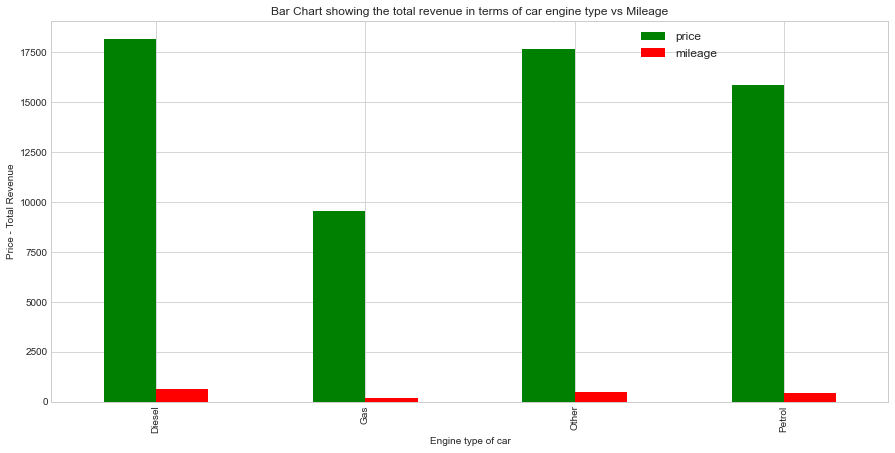

In [279]:
car_sales.groupby(['engType'])['price', 'mileage'].mean().plot(kind='bar', figsize=(15, 7), color='grey'"green")
plt.xlabel('Engine type of car')
plt.ylabel('Price - Total Revenue')
plt.title('Bar Chart showing the total revenue in terms of car engine type vs Mileage')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.),fontsize=12)

Diesel & other type brought more revenue to the company. 

Diesel & other type  provides better mileage.(Other type can be hybrid or electric vehicle)


In [ ]:
car_sales.groupby([''])['price'].mean().plot(kind='bar', figsize=(15, 7), color='grey')
plt.xlabel('Body type of the car')
plt.ylabel('Price - Total Revenue')
plt.title('Bar Chart showing the total revenue in terms of car body type')
plt.legend(labels=('price'))
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.),fontsize=12)

Text(0.5, 1.0, 'Donut Plot showing the registration done in percentage')

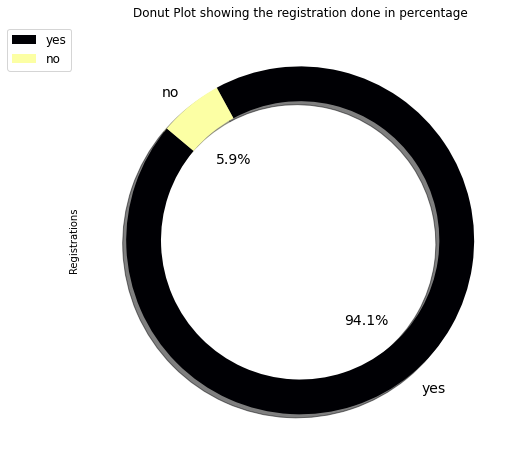

In [100]:
space = np.ones(1)/2
car_sales['registration'].value_counts().plot(kind='pie',  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=140, figsize=(8,8), cmap='inferno', )
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.ylabel('Registrations')
plt.title('Donut Plot showing the registration done in percentage')

Text(0.5, 1.0, 'Donut Plot showing the drive of car sold')

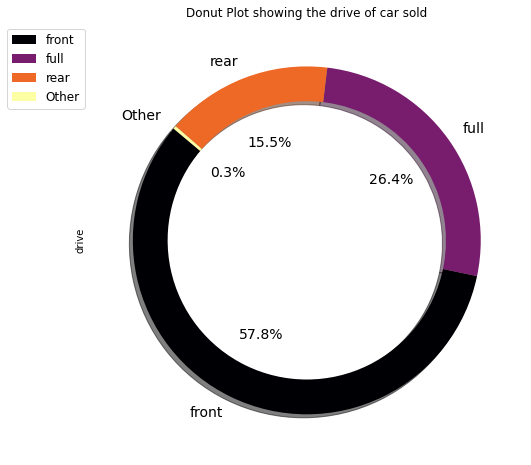

In [101]:
space = np.ones(6)/5
car_sales['drive'].value_counts().plot(kind='pie',  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=140, figsize=(8,8), cmap='inferno', )
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.ylabel('drive')
plt.title('Donut Plot showing the drive of car sold')

# Adding a column for Cars sold and keeping its value as 1

In [221]:

car_sales["Cars sold"] =1
car_sales.describe()

,price,mileage,engV,year,Cars sold
count,9463.000000,9463.000000,9029.000000,9463.000000,9463.0
mean,15537.188707,441.308993,2.641444,2006.525837,1.0
std,22947.612648,1614.785214,5.963016,7.062584,0.0
min,259.350000,1.000000,0.100000,1953.000000,1.0
25%,5500.000000,80.000000,1.600000,2004.000000,1.0
50%,9200.000000,136.000000,2.000000,2008.000000,1.0
75%,16500.000000,204.000000,2.500000,2012.000000,1.0
max,547800.000000,9200.000000,99.990000,2016.000000,1.0


Text(0.5, 1.0, 'Line chart showing the variation of revenue across different items')

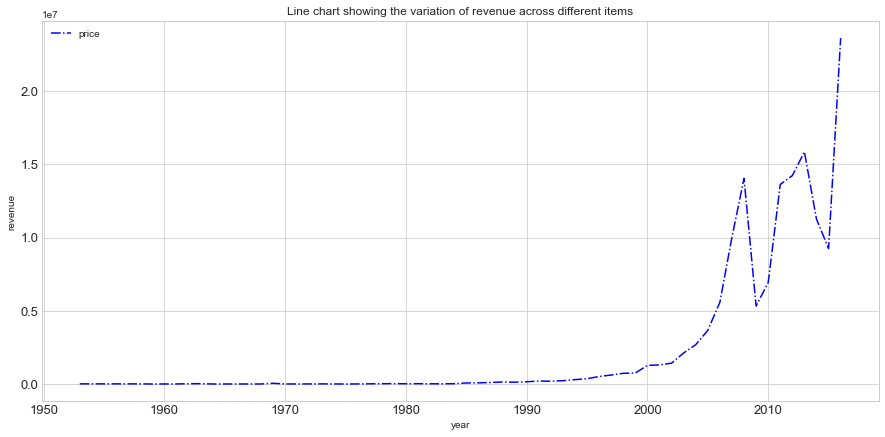

In [281]:
car_groupbuy = car_sales.groupby('year').sum()
car_groupbuy

car_groupbuy[['price']].plot(kind='line', figsize=(15,7), color='blue', fontsize=13, linestyle='-.')



plt.xlabel('year')
plt.ylabel('revenue')
plt.title('Line chart showing the variation of revenue across different items')






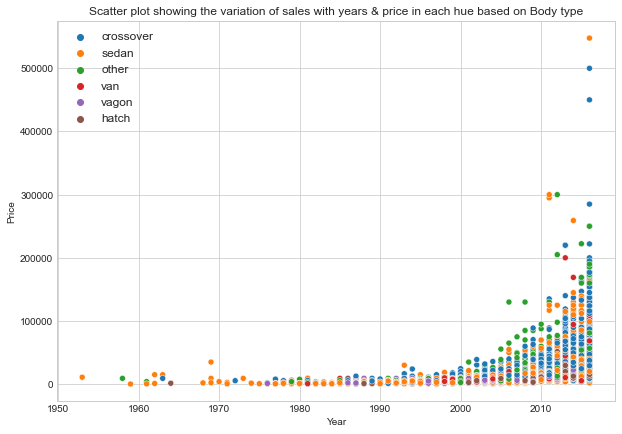

In [277]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=car_sales, x='year', y='price', hue='body')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot showing the variation of sales with years & price in each hue based on Body type')
plt.grid(True)
plt.legend(fontsize=12)

Diesel & other type brought more revenue to the company. 

Diesel & other type  provides better mileage.(Other type can be hybrid or electric vehicle)



Text(0.5, 1.0, 'Line chart showing No of cars sold in given duration')

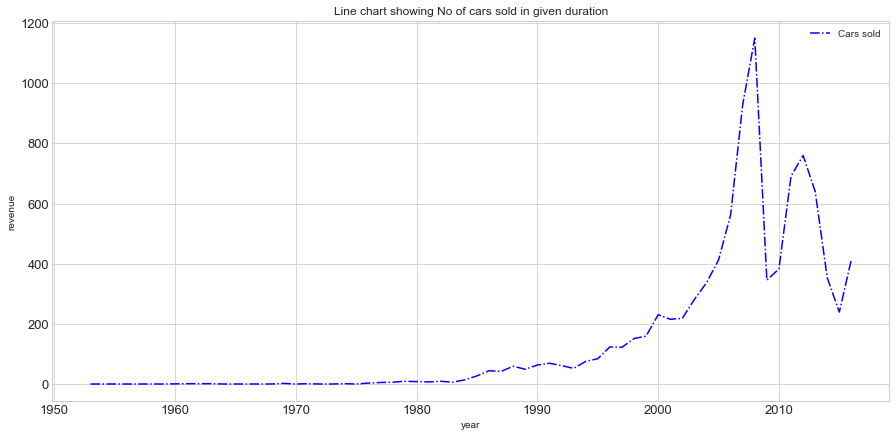

In [259]:
car_groupbuy = car_sales.groupby('year').sum()
car_groupbuy

car_groupbuy[['Cars sold']].plot(kind='line', figsize=(15,7), color='blue', fontsize=13, linestyle='-.')



plt.xlabel('year')
plt.ylabel('revenue')
plt.title('Line chart showing No of cars sold in given duration')


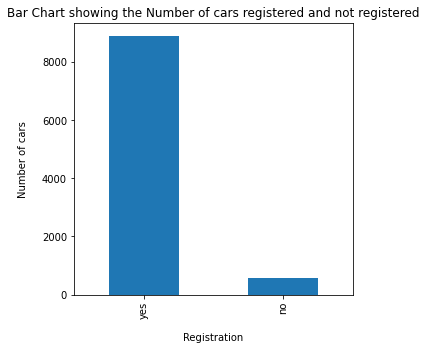

In [113]:
car_sales['registration'].value_counts().plot(kind='bar', figsize=(5,5));
plt.title('Bar Chart showing the Number of cars registered and not registered')


plt.xlabel("Registration", labelpad=14)
plt.ylabel("Number of cars", labelpad=14)
plt.savefig('barchart.png') 

# Insights

In the given duration sedan & crossover sold the most and it might be peoples preference when it comes to style.

Crossover  type brought more revenue to the company and the same time crossover provides better mileage. It might be the mileage factor which attracts more sale.

Crossover and sedan grows over the time and even in future more customer may tend to buy the same.

Front car drive is the most sold car type but when it comes to revenue perspective, full drive brought in more revenue and at the same full drive provides better mileage.

Diesel & other engine type brought major revenue to company and it also provides better mileage.

Majority of the cars sold during given time period were registered except very few number 

The sales started increasing from the year 2000 and thus increase in revenue. Due to economic development and need for transportation vehicle /  car the trend will keep increasing.


# Action Item

Based on the insights the company can :
  
Focus  / invest more on selling vehicles which is  Crossover model  which has got Full drive with diesel engine or other engine type.   

Focus / invest more on selling vehicles which is  sedan model which has got Full drive with diesel engine or other engine type.

Explore on other type engine and this can be electric or hybrid.
